## Weapon Types and Terrorism

### a. Most Common Weapon Types in Different Regions

In [1]:
import pandas as pd

data = pd.read_csv('PerpsAdded.csv', encoding='ISO-8859-1', low_memory=False, sep=';')

# Group the data by 'region_txt' and 'weaptype1_txt', count the number of events, and reset the index
weapons_by_region = data.groupby(['region_txt', 'weaptype1_txt']).size().reset_index(name='count')

# Find the weapon type with the highest count in each region
idx = weapons_by_region.groupby(['region_txt'])['count'].transform(max) == weapons_by_region['count']
most_common_weapons = weapons_by_region[idx]

# Display the results
print(most_common_weapons)

                      region_txt weaptype1_txt  count
1          Australasia & Oceania    Explosives     80
10   Central America & Caribbean      Firearms   5679
17                  Central Asia    Explosives    254
25                     East Asia    Explosives    333
36                Eastern Europe    Explosives   3089
47    Middle East & North Africa    Explosives  32283
58                 North America    Explosives   1557
70                 South America    Explosives   9098
81                    South Asia    Explosives  22568
93                Southeast Asia      Firearms   5634
103           Sub-Saharan Africa      Firearms   7499
112               Western Europe    Explosives   8657


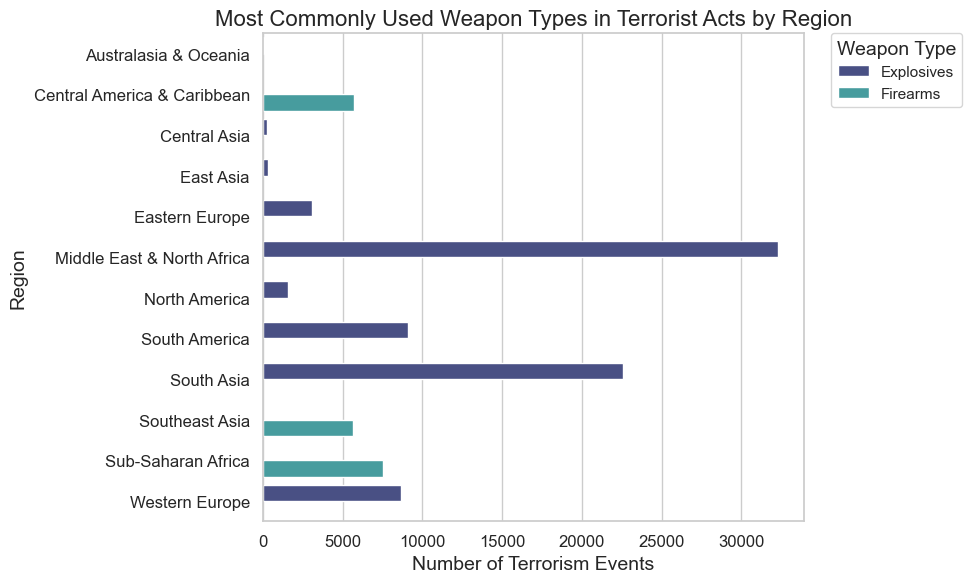

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file with a different encoding and set low_memory to False
data = pd.read_csv('PerpsAdded.csv', encoding='ISO-8859-1', low_memory=False, sep=';')

# Group by region and weapon type, and count the number of events
weapon_counts_by_region = data.groupby(['region_txt', 'weaptype1_txt']).size().reset_index(name='count')

# Find the most commonly used weapon type for each region
most_common_weapons = weapon_counts_by_region.loc[weapon_counts_by_region.groupby('region_txt')['count'].idxmax()]

# Set the style of the plot
sns.set(style="whitegrid")

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='count', y='region_txt', hue='weaptype1_txt', data=most_common_weapons, palette='mako')

# Add labels and title
plt.xlabel('Number of Terrorism Events', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.title('Most Commonly Used Weapon Types in Terrorist Acts by Region', fontsize=16)

# Adjust y-axis labels for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Weapon Type", title_fontsize=14)

plt.savefig('Most Commonly Used Weapon Types in Terrorist Acts by Region.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()

### b. Weapon types and their impact on fatalities

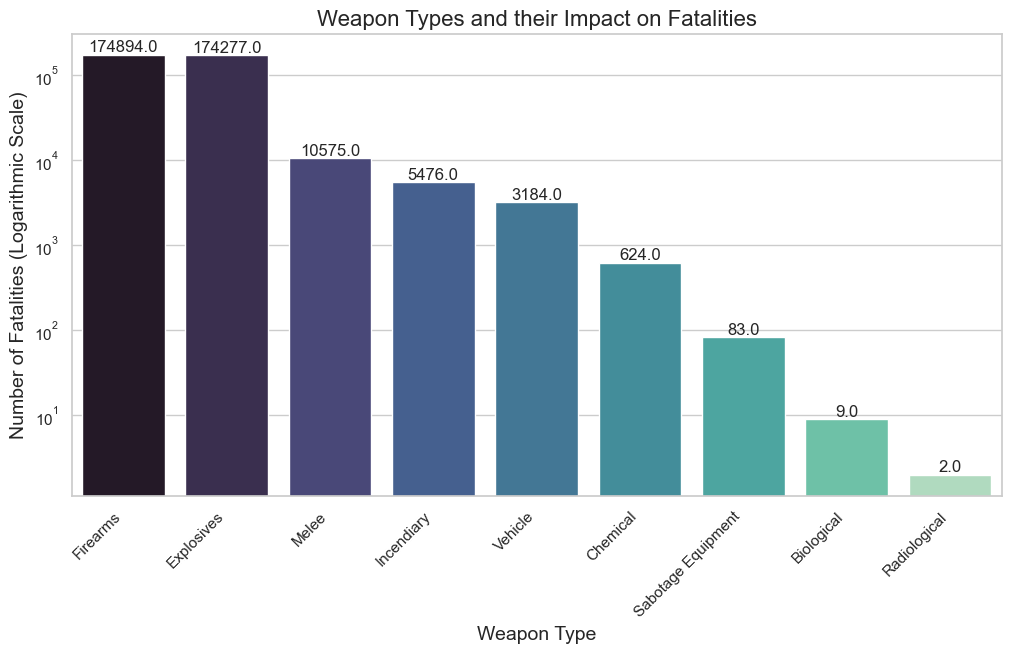

          Weapon Type  Number of Fatalities
0            Firearms              174894.0
1          Explosives              174277.0
2               Melee               10575.0
3          Incendiary                5476.0
4             Vehicle                3184.0
5            Chemical                 624.0
6  Sabotage Equipment                  83.0
7          Biological                   9.0
8        Radiological                   2.0


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('PerpsAdded.csv', encoding='ISO-8859-1', low_memory=False, sep=';')

# Calculate the number of fatalities for each weapon type
weapon_fatalities = data.groupby('weaptype1_txt')['nkill'].sum().sort_values(ascending=False)

# Remove "Unknown", "Other", and "Fake Weapons"
weapon_fatalities = weapon_fatalities.drop(["Unknown", "Other", "Fake Weapons"])

# Rename 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)' to 'Vehicle'
weapon_fatalities.index = weapon_fatalities.index.map(lambda x: 'Vehicle' if x == 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)' else x)

# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=weapon_fatalities.index, y=weapon_fatalities.values, palette="mako", log=True)

# Add labels and title
plt.xlabel('Weapon Type', fontsize=14)
plt.ylabel('Number of Fatalities (Logarithmic Scale)', fontsize=14)
plt.title('Weapon Types and their Impact on Fatalities', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the values above the bars
for index, value in enumerate(weapon_fatalities.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

# Save the plot as a PNG file
plt.savefig('weapon_fatalities_modified.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Tabulate the findings
weapon_fatalities_table = pd.DataFrame({"Weapon Type": weapon_fatalities.index,
                                        "Number of Fatalities": weapon_fatalities.values})
print(weapon_fatalities_table)